**ANALYSIS**

Observed Trend 1:
After review of the dataset, there is a large amount Drivers within the Urban areas. What I found interesting was the Driver Count and Total Rider ratio based on the below table. This could be based on the amount of transportation in the Urban area which would equal less riders or vice versa.


Observed Trend 2:
The scatter plot shows the Total Number of Riders vs. Average Fares by city that is categorized by City Type (Urban (gold), Rural(red) and Suburban(lightblue). The plot sizes are based on Total Drivers. The graph shows an when there is a large amount drivers / riders in the Urban areas, there is an low average fare at a range of $20-30. Whereas, rides that take place in the Rural and Suburban areas have less Total Drivers / Riders but there are increase in the Average Fare. This could be due to a higher rate based on distance of travel.



Observed Trend 3:
The pie chart obersvation shows a breakdown of the Total Fare, Drivers and Riders based the City Type. As you can see, there is a significant increase of the 3 categories based on the Urban areas.



In [2]:
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from scipy import stats
from scipy.stats import linregress

In [3]:
# Read in data
city_data = pd.read_csv("city_data.csv")
ride_data = pd.read_csv("ride_data.csv")

#Create DataFrame for City Data
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

#Create DataFrame for Ride Data
ride_data_df = pd.DataFrame(ride_data)
ride_data_df.head()

#Merge both DataFrame for City and Ride using Groupby by 'City'
combined_data_df = pd.merge(ride_data, city_data, how="left", on=["city", "city"])
combined_data_df.head()

                          

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [4]:
#Group DataFrame by City for Average and total calculations
city_group = combined_data_df.groupby(['city'])
city_group

#Average Fare ($) Per City
average_fare = city_group['fare'].mean()

#Total Number of Rides Per City
total_num_rides = city_group['ride_id'].count()


#Total Number of Drivers Per City
total_num_drivers = city_group['driver_count'].mean()


plot_data = pd.DataFrame({"Average Fare": average_fare,
                           "Total Rides": total_num_rides,
                          "Total Drivers": total_num_drivers
                           })

plot_data.head()


,Average Fare,Total Drivers,Total Rides
city,,,
Alvarezhaven,23.928710,21,31
Alyssaberg,20.609615,67,26
Anitamouth,37.315556,16,9
Antoniomouth,23.625000,21,22
Aprilchester,21.981579,49,19


In [5]:
#City Type Data Collection
urban_data = combined_data_df.loc[(combined_data_df["type"] == "Urban")]
rural_data = combined_data_df.loc[(combined_data_df["type"] == "Rural")]
suburban_data = combined_data_df.loc[(combined_data_df["type"] == "Suburban")]

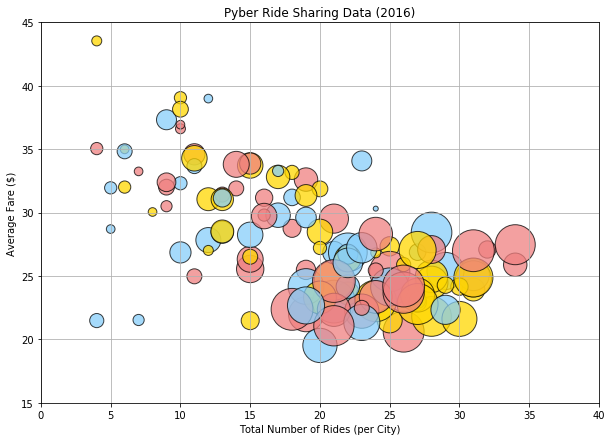

In [6]:
# Create a scatter plot which compares Total Rides to Average Fare Per City Type
group = ["Rural", "Urban", "Suburban"]
colors = ["gold","lightcoral","lightskyblue"]
plot_data.plot.scatter(x='Total Rides', y='Average Fare',color=colors, s=plot_data['Total Drivers']*25, alpha=0.75, edgecolor="black", figsize=(10,7))
plt.ylim(15,45)
plt.xlim(0,40)
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()
plt.show()

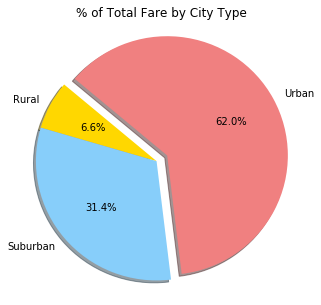

In [8]:
#Create Pie Chart based on % Total Fares by City Type
total_fare = combined_data_df.groupby(['type']).sum()['fare']
total_fare


colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
total_fare_chart = total_fare.plot(kind='pie', figsize=(5,5), colors=colors, explode=explode, shadow=True, autopct="%1.1f%%", startangle=140)
total_fare_chart.set_title("% of Total Fare by City Type")
plt.axis('tight')
plt.ylabel("")
plt.show()

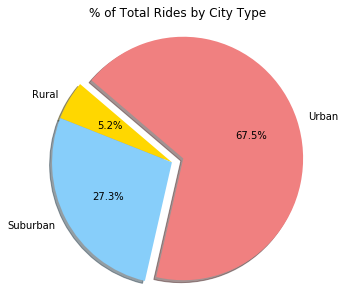

In [9]:
#Create Pie Chart based on % Total Rides by City Type
total_ride_count = combined_data_df.groupby(['type']).count()['ride_id']

#Total Fares per City Type
# total_ride_count = city_type_group['ride_id'].count()

colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
total_ride_chart = total_ride_count.plot(kind='pie', figsize=(5,5), colors=colors, explode=explode, shadow=True, autopct="%1.1f%%", startangle=140)
total_ride_chart.set_title("% of Total Rides by City Type")
plt.axis('tight')
plt.ylabel("")
plt.show()

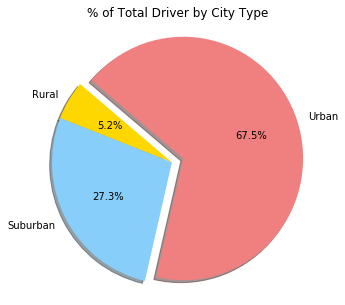

In [11]:
#Create Pie Chart based on % Total Driver by City Type
total_driver_count = combined_data_df.groupby(['type']).count()['driver_count']


colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
total_driver_chart = total_driver_count.plot(kind='pie', figsize=(5,5), colors=colors, explode=explode, shadow=True, autopct="%1.1f%%", startangle=140)
total_driver_chart.set_title("% of Total Driver by City Type")
plt.axis('tight')
plt.ylabel("")
plt.show()